In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('data-sets/GlobalLandTemperaturesByCountry.csv')


In [2]:
data = global_temp_country.copy()

data.dropna(axis = 0, inplace = True)

data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format

data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
data2['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = data2.groupby(['year', 'Country'])[['AverageTemperature']].mean().reset_index()

earth_data2 = earth_data.copy()
global_temp_country_clear = earth_data2[~earth_data2['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands','United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(
        global_temp_country_clear[global_temp_country_clear['Country'] == country] ['AverageTemperature'][global_temp_country_clear['year'] == 2013].mean()
        -
    global_temp_country_clear[global_temp_country_clear['Country'] == country] ['AverageTemperature'][global_temp_country_clear['year'] == 1913].mean())
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Rise in Temperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average increase in land temperature over the last century (2013 - 1913)',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )


fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


In [3]:
globalTemperatures = pd.read_csv("data-sets/GlobalTemperatures.csv")

globalTemperatures.dropna(axis = 0, inplace = True)
globalTemperatures['Date'] = pd.to_datetime(globalTemperatures.dt) # converted all dates to the same format

data2 = globalTemperatures.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column
data2['year'] = data2['Date'].dt.year

land_avg = data2.groupby(by = 'year')[['LandAverageTemperature']].mean().reset_index()


df_co2 = pd.read_csv('data-sets/co2-annmean-mlo.csv')

df_co2['Year'] = pd.DatetimeIndex(df_co2['Year']).year

df_coh2  = df_co2.copy()
land_avg2  = land_avg.copy()

df_coh2['Mean'] = (df_coh2['Mean'] - 315.97)/(406.55 - 315.97)

land_avg2['LandAverageTemperature'] = (land_avg['LandAverageTemperature'] - 8.732667)/(9.831 - 8.732667)

from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Land Temperature", "CO2 concentration (ppm)", "Land Tempeature v/s CO2 emissions"))

# fig.update_layout(title="Global Warming!", font=dict( family="Courier New, monospace", size=12, color="#7f7f7f"),
#                   title_font_size = 20, hovermode= 'closest')

fig.update_xaxes(showline=True, linewidth=1)
fig.update_yaxes(showline=True, linewidth=1)
fig.update_xaxes(range=[1959, 2017])

# Figure data
fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines+markers',
                        name = 'Land Avg Temp (in C)', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = df_co2['Year'], y = df_co2['Mean'], mode = 'lines+markers',
                        name = 'CO2 Concentration', marker_color='rgb(210,105,30)'), row = 2, col = 1)


fig.add_trace(go.Scatter(x = df_coh2['Year'], y = df_coh2['Mean'], mode = 'lines',
                        name = 'Co2 Concentration', line={'dash': 'dash', 'color': 'rgb(210,105,30)'}), row = 3, col = 1)

fig.add_trace(go.Scatter(x = land_avg2['year'], y = land_avg2['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp (in C)', marker_color='rgb(128, 0, 0)'), row = 3, col = 1)


fig.update_layout(
    width=850,
    height=850)


fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=2, col=1)
fig.update_xaxes(title_text="Years", row=3, col=1)

fig.update_yaxes(title_text="Temperature (Celsius)", row=1, col=1)
fig.update_yaxes(title_text="Concentration", row=2, col=1)
fig.update_yaxes(title_text="Normalized ", row=3, col=1)




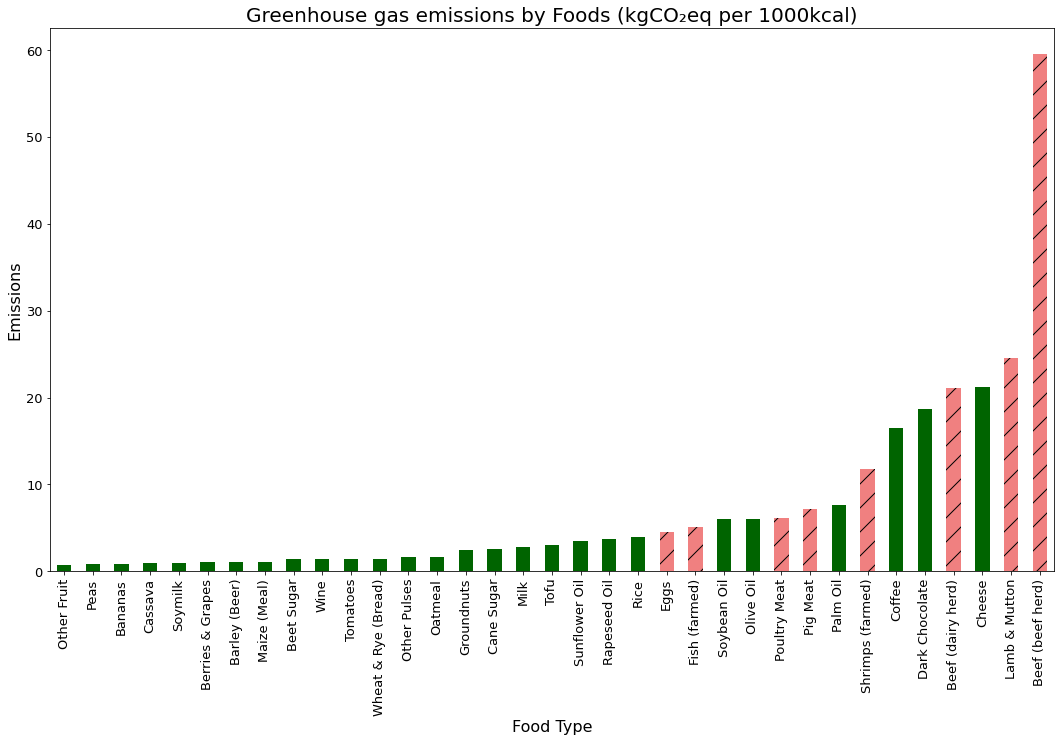

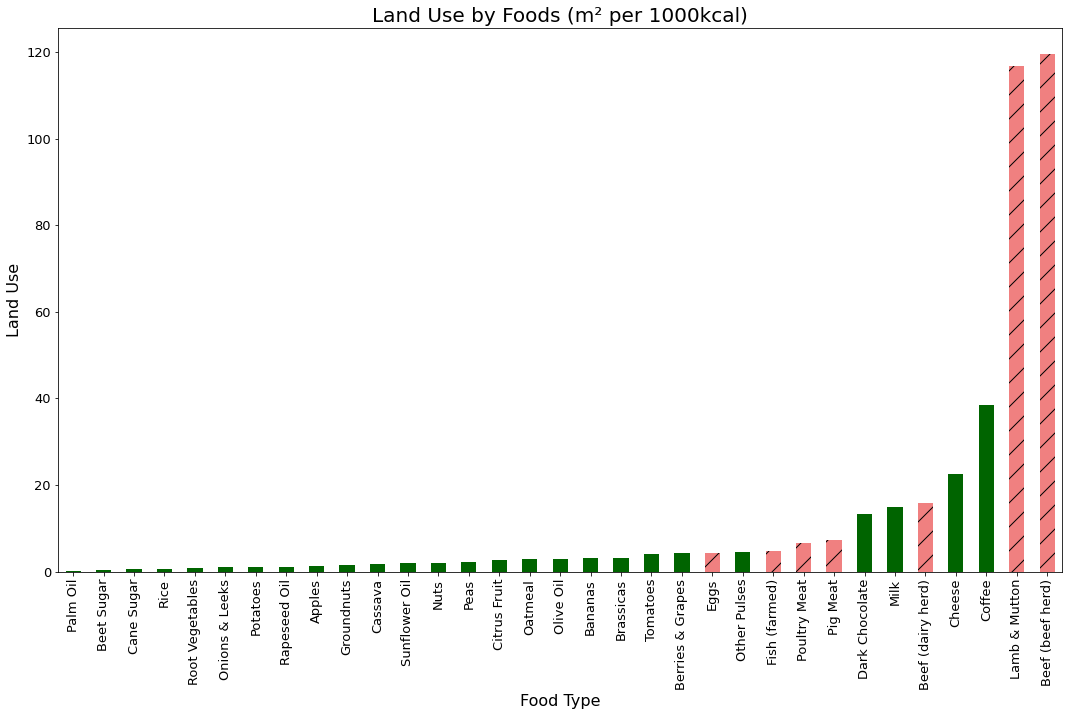

In [4]:
meatwise_consumption = pd.read_csv('data-sets/Food_Production.csv')

c = ['darkgreen','darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen',
'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen',
'darkgreen', 'darkgreen', 'lightcoral', 'lightcoral', 'darkgreen', 'darkgreen', 'lightcoral', 'lightcoral', 'darkgreen',
'lightcoral', 'darkgreen', 'darkgreen', 'lightcoral', 'darkgreen', 'lightcoral', 'lightcoral']

patterns = ['','', '', '', '', '', '', '', '', '',
'', '', '', '', '', '', '', '', '',
'', '', '/', '/', '', '', '/', '/', '',
'/', '', '', '/', '', '/', '/']

food_df = meatwise_consumption.copy()
food_df = food_df.sort_values(by=['Total_emissions'])
food_df = food_df.where(food_df['Total_emissions'] > 0.5)
food_df = food_df[food_df['Total_emissions'].notna()]

food_df.plot.bar(x='Food product', y='Total_emissions', 
                 color = c, figsize=(18,10), fontsize=13, legend=False, hatch = patterns)
plt.xlabel("Food Type", size= 16)
plt.ylabel("Emissions", size= 16)
plt.title("Greenhouse gas emissions by Foods (kgCO₂eq per 1000kcal)", size= 20)
plt.show()



c1 = ['darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen',
'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen',
'darkgreen', 'darkgreen', 'darkgreen', 'lightcoral', 'darkgreen', 'lightcoral', 'lightcoral', 'lightcoral', 'darkgreen',
'darkgreen', 'lightcoral', 'darkgreen', 'darkgreen', 'lightcoral', 'lightcoral']

patterns1 = ['', '', '', '', '', '', '', '', '',
'', '', '', '', '', '', '', '', '',
'', '', '', '/', '', '/', '/', '/', '',
'', '/', '', '', '/', '/']

land_df = meatwise_consumption.copy()
land_df = land_df.sort_values(by=['Land use per 1000kcal (m² per 1000kcal)'])
land_df = land_df[land_df['Land use per 1000kcal (m² per 1000kcal)'].notna()]

land_df.plot.bar(x='Food product', y='Land use per 1000kcal (m² per 1000kcal)', color = c1, figsize=(18,10), fontsize=13, legend=False, hatch = patterns1)
plt.xlabel("Food Type", size= 16)
plt.ylabel("Land Use", size= 16)
plt.title("Land Use by Foods (m² per 1000kcal)", size= 20)
plt.show()



In [5]:
global_meat_consumption = pd.read_csv('data-sets/meat_consumption_worldwide.csv')
# THND_TONNE- annual consumption in thousands of tonnes
global_meat_consumption2 = global_meat_consumption.where(global_meat_consumption.MEASURE == 'THND_TONNE')
global_meat_consumption3 = global_meat_consumption2.groupby(['SUBJECT', 'TIME'])['Value'].mean().reset_index()

# Global Annual consumption in thousands of tonnes
fig = px.line(global_meat_consumption3, x='TIME', y='Value', 
              labels={
                     "TIME": "Years",
                     "Value": "Annual consumption",
                     "Subject": "Meat Type"
                 }, color='SUBJECT', line_dash='SUBJECT')

fig.update_layout(
    title = {
        'text': "Global Annual consumption (in thousands of tonnes)",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title = "Meat Type",)


fig.show()

from plotly.offline import init_notebook_mode, iplot

global_population = pd.read_csv('data-sets/world_population.csv')

years = ['1970',
         '1980',
         '1990',
         '2000',
         '2010',
         '2015',
         '2020',
         '2022']

global_population = global_population.rename(columns={
    '1970 Population': '1970',
    '1980 Population': '1980',
    '1990 Population': '1990',
    '2000 Population': '2000',
    '2010 Population': '2010',
    '2015 Population': '2015',
    '2020 Population': '2020',
    '2022 Population': '2022'})


df = pd.DataFrame(dict(
    x = global_population[years].columns,
    y = global_population[years].sum()
))

fig = px.line(df, x="x", y="y", title="Global Population trend", markers=True) 

fig.update_layout(
    title = {
        'text': "Global Population trend",
        'y':0.87,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},)

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Population")

fig.show()


In [6]:
from plotly.offline import init_notebook_mode, iplot

forest = pd.read_csv('data-sets/world-bank-forest-data.csv')
years = ['1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
forest2 = forest[years].sum()

df = pd.DataFrame(dict(
    x = forest[years].columns,
    y = forest[years].sum()
))

fig = px.line(df, x="x", y="y", title="Global Forest Cover", markers=True) 

fig.update_layout(
    title = {
        'text': "Global Forest Cover",
        'y':0.87,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},)

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Forest area (sq. km)")

fig.show()

In [7]:
dis_dam = pd.read_csv('data-sets/economic-damage-from-natural-disasters.csv')
dis_ct = pd.read_csv('data-sets/number-of-natural-disaster-events.csv')
deaths = pd.read_csv('data-sets/causes_of_deaths.csv')

dis_dam.drop('Code', axis=1, inplace=True)
dis_dam.rename(mapper={'Total economic damage from natural disasters (US$)':'Damage Cost'}, axis=1, inplace=True)
dis_ct.drop('Code', axis=1, inplace=True)
dis_ct.rename({'Number of reported natural disasters (reported disasters)':'Disasters'}, axis=1, inplace=True)

dis_types = dis_dam['Entity'].unique()
brk_dis = dis_dam[dis_dam['Entity']!='All natural disasters']

brk_dis_ct = dis_ct[dis_ct['Entity']!='All natural disasters']
brk_dis_ct = dis_ct[ (dis_ct['Entity'] == 'Drought') | (dis_ct['Entity'] == 'Flood') | (dis_ct['Entity'] == 'Extreme temperature') | (dis_ct['Entity'] == 'Extreme weather') | (dis_ct['Entity'] == 'Wildfire')]

fig1 = px.bar(brk_dis_ct, x='Year', y='Disasters', color='Entity', hover_name='Entity', labels={'Disasters':'Disaster Count'})

fig1.update_layout(
    title = {
        'text': "Global Natural Disaster Count by Type",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title = "Disaster Type")

fig1.update_xaxes(range=[1940, 2017])

fig1.show()

brk_dis = brk_dis[ (brk_dis['Entity'] == 'Drought') | (brk_dis['Entity'] == 'Flood') | (brk_dis['Entity'] == 'Extreme temperature') | (brk_dis['Entity'] == 'Extreme weather') | (brk_dis['Entity'] == 'Wildfire')]

fig2 = px.bar(brk_dis, x='Year', y='Damage Cost', color='Entity', labels={'Damage Cost':'Damage Cost (in USD)'})

fig2.update_xaxes(range=[1940, 2017])

fig2.update_layout(
    title = {
        'text': "Global Disaster Costs by Type",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title = "Disaster Type")


fig2.show()


In [8]:
people_affected = pd.read_csv('data-sets/total-affected-by-natural-disasters.csv')
people_affected = people_affected[(people_affected['Entity'] == 'Drought') | (people_affected['Entity'] == 'Flood') | (people_affected['Entity'] == 'Extreme temperature') | (people_affected['Entity'] == 'Extreme weather') | (people_affected['Entity'] == 'Wildfire')]

fig2 = px.bar(people_affected, x='Year', y='Total affected', 
              color='Entity', 
              #color_discrete_map={'Drought':'yellow', 'Flood':'grey', 'Extreme temperature':'brown', 'Extreme weather':'yellow', 'Wildfire':'grey'},
              labels={'Total affected':'People affected'})

fig2.update_xaxes(range=[1940, 2017])

fig2.update_layout(
    title = {
        'text': "People affectected Globally by Disasters",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title = "Disaster Type")

fig2.show()


Pre-Industrial Mean Temp: 14.97 Degrees Celsius
Danger Benchmark 1: 16.47 Degrees Celsius
Danger Benchmark 2: 16.97 Degrees Celsius


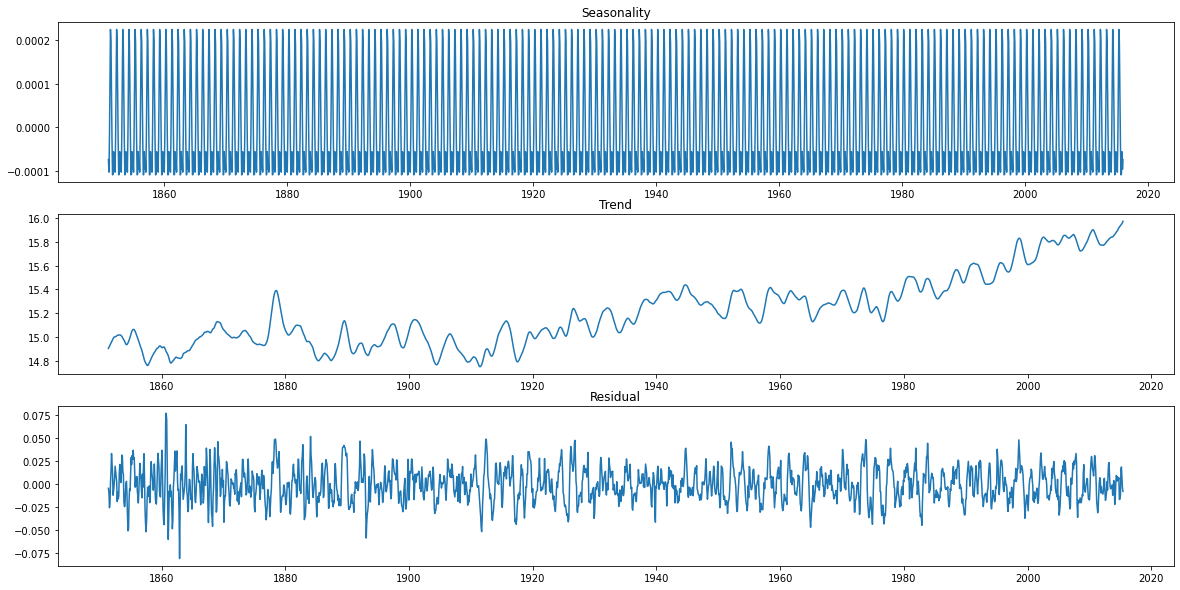

Stationarity Test Seasonal Differencing: Test Statistic   -1.320657e+01
p-value           1.067831e-24
Lags Used         2.500000e+01
Observations      1.942000e+03
dtype: float64


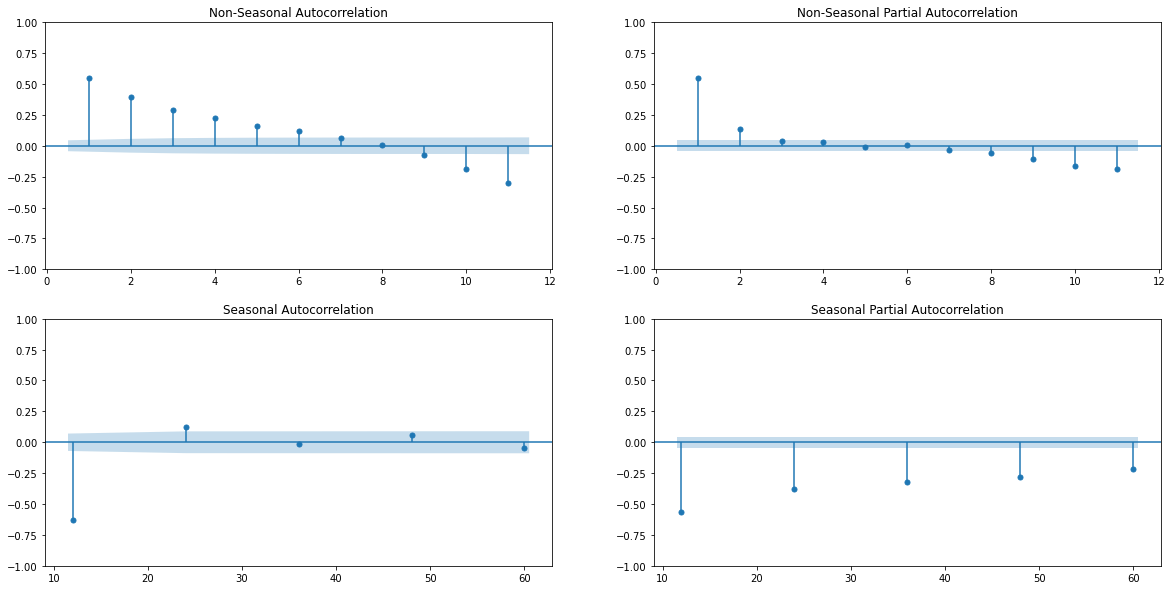

/Users/himanshukohli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/himanshukohli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.72923D+00    |proj g|=  3.50340D+01

At iterate    5    f= -3.03327D+00    |proj g|=  1.82027D-01

At iterate   10    f= -3.03441D+00    |proj g|=  6.21757D+00

At iterate   15    f= -3.06824D+00    |proj g|=  6.29254D+00

At iterate   20    f= -3.06968D+00    |proj g|=  2.59984D-01

At iterate   25    f= -3.07850D+00    |proj g|=  6.59744D+00

At iterate   30    f= -3.08440D+00    |proj g|=  1.56548D-01

At iterate   35    f= -3.15494D+00    |proj g|=  6.43890D+00

At iterate   40    f= -3.15699D+00    |proj g|=  6.36540D-02

At iterate   45    f= -3.15699D+00    |proj g|=  1.80878D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               LOMA_Temp   No. Observations:                  489
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                1543.782
Date:                                 Mon, 12 Dec 2022   AIC                          -3077.564
Time:                                         20:17:07   BIC                          -3056.737
Sample:                                     04-01-1975   HQIC                         -3069.374
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9348      0.029     32.608      0.000       0.879       0.991
ma.L1         -0.5041      0.052     -9.709      0.000      -0.606      -0.402
ma.S.L12      -1.9709      0.217     -9.097      0.000      -2.396      -1.546
ma.S.L24       0.9878      0.220      4.497      0.000       0.557       1.418
sigma2      7.021e-05   1.39e-05      5.043      0.000    4.29e-05    9.75e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.92   Prob(JB):                         0.96
Heteroskedasticity (H):               1.09   Skew:                            -0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
gl_temp = pd.read_csv('data-sets/GlobalTemperatures.csv')
gl_temp.dropna(inplace=True)
gl_temp['dt'] = pd.to_datetime(gl_temp['dt'])
gl_temp.rename({'dt':'Date'}, inplace=True, axis=1)
gl_temp.set_index('Date', inplace=True)
gl_temp['LOMA_Temp'] = gl_temp['LandAndOceanAverageTemperature'].rolling(12).mean()
gl_temp['LMA_Temp'] = gl_temp['LandAverageTemperature'].rolling(12).mean()
gl_temp.dropna(inplace=True)
gl_temp_ts = gl_temp[['LandAverageTemperature']]


pre_mn = gl_temp['LOMA_Temp'].loc[:'1900-01-01'].mean()

print('Pre-Industrial Mean Temp:', round(pre_mn, 3), 'Degrees Celsius')
print('Danger Benchmark 1:', round(pre_mn+1.5, 3), 'Degrees Celsius')
print('Danger Benchmark 2:', round(pre_mn+2, 3), 'Degrees Celsius') 

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(gl_temp['LOMA_Temp'], model='additive', period=12)

fig, ax = plt.subplots(3,1, figsize=(20, 10))
ax[0].plot(decomp.seasonal)
ax[1].plot(decomp.trend)
ax[2].plot(decomp.resid)
ax[0].set_title('Seasonality')
ax[1].set_title('Trend')
ax[2].set_title('Residual')
plt.show()


diff2 = gl_temp.diff().diff(12).dropna()

result = adfuller(diff2['LOMA_Temp'])
adtest = pd.Series(result[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Observations'])

print('Stationarity Test Seasonal Differencing:', adtest)

fig, ax = plt.subplots(2,2, figsize=(20, 10))

plot_acf(diff2['LOMA_Temp'], lags=11, zero=False, alpha=0.05, title='Non-Seasonal Autocorrelation', ax=ax[0,0])
plot_pacf(diff2['LOMA_Temp'], lags=11, zero=False, alpha=0.05, title='Non-Seasonal Partial Autocorrelation', ax=ax[0,1])

plot_acf(diff2['LOMA_Temp'], lags=[12, 24, 36, 48, 60], zero=False, alpha=0.05, title='Seasonal Autocorrelation', ax=ax[1,0])
plot_pacf(diff2['LOMA_Temp'], lags=[12, 24, 36, 48, 60], zero=False, alpha=0.05, title='Seasonal Partial Autocorrelation', ax=ax[1,1])
plt.show()

order = (1, 1, 1) 
sorder = (0, 1, 2, 12)

sarimax = SARIMAX(gl_temp['LOMA_Temp'].loc['1975-04':], order=order, seasonal_order=sorder)


t_model = sarimax.fit(maxiter=200)

t_model.summary()


In [10]:
forecast = t_model.get_prediction(start=-240)

def mape(fc, true):
    mape = np.mean((np.abs(fc-true)/np.abs(true)))
    return mape

acc = mape(forecast.predicted_mean, gl_temp['LOMA_Temp'].iloc[-240:])
print('Mean Absolute Percent Error:', acc)

fc_m = t_model.get_forecast(steps=303)

print('March 2041 Predicted Temp.:', round(fc_m.predicted_mean[-1], 3), 'Degrees Celsius')

fig1 = px.line(gl_temp, x=gl_temp.index, y=gl_temp.LOMA_Temp, title='Predicted Global Average Temperature w/ Mean Predicted CO2 Levels', labels={'LOMA_Temp':'Temp. (C)'})
fig1.add_scatter(x=fc_m.predicted_mean.index, y=fc_m.predicted_mean, mode='lines', name='Predicted')
fig1.add_scatter(x=fc_m.predicted_mean.index, y=fc_m.conf_int().iloc[:,0], name='Lower Bound')
fig1.add_scatter(x=fc_m.predicted_mean.index, y=fc_m.conf_int().iloc[:,1], fill='tonexty', name='Upper Bound')
fig1.add_scatter(x=['1850-12-01', '2041-03-01'], y=[pre_mn+1.5, pre_mn+1.5], mode='lines', name='1.5 Degree Increase')
fig1.add_scatter(x=['1850-12-01', '2041-03-01'], y=[pre_mn+2, pre_mn+2], mode='lines', name='2 Degree Increase')

fig1.update_xaxes(title_text="Years")

fig1.show()

Mean Absolute Percent Error: 0.00044395613399139785
March 2041 Predicted Temp.: 16.471 Degrees Celsius


In [11]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

countries = pd.read_csv("data-sets/GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("data-sets/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, we will add 6 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map - Temperature increase')

fig.show()